In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dirname = os.path.join(os.getcwd(), '/content/drive/MyDrive/archive.zip (Unzipped Files)/flores')
imgpath = dirname + os.sep 
 
images = []
directories = []
dircount = []
prevRoot=''
cant=0
 
print("leyendo imagenes de ",imgpath)
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)[0:490,0:490]
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)
 
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  /content/drive/MyDrive/archive.zip (Unzipped Files)/flores/
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/narciso 1
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/campanilla 80
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/lirio 80
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/campana_azul 80
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/azafran 80
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/iris 80
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/lirio_tigre 80
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/tulipan 80
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/fritillary 80
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/girasol 80
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/margarita 80
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/pie_de_potro 80
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/dien

In [5]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  1360


In [6]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 narciso
1 campanilla
2 lirio
3 campana_azul
4 azafran
5 iris
6 lirio_tigre
7 tulipan
8 fritillary
9 girasol
10 margarita
11 pie_de_potro
12 diente_de_leon
13 primula
14 boton_de_oro
15 flor_de_viento
16 pensamiento


In [7]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)

print('Output classes : ', classes)

Total number of outputs :  17
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [8]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (1088, 490, 490, 3) (1088,)
Testing data shape :  (272, 490, 490, 3) (272,)


Text(0.5, 1.0, 'Ground Truth : 10')

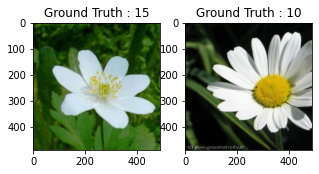

In [9]:

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [10]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [11]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 15
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [12]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [13]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(870, 490, 490, 3) (218, 490, 490, 3) (870, 17) (218, 17)


In [14]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 25 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 32 # cantidad de imágenes que se toman a la vez en memoria

In [15]:
flower_model = Sequential()
flower_model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(490,490,3)))
flower_model.add(MaxPooling2D((2, 2),padding='same'))

flower_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((2, 2),padding='same'))

flower_model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((2, 2),padding='same'))

flower_model.add(Conv2D(128, kernel_size=(3, 3),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((2, 2),padding='same'))

flower_model.add(Flatten())
flower_model.add(Dense(256, activation='relu'))
flower_model.add(Dropout(0.25))

flower_model.add(Dense(nClasses, activation='softmax'))

In [16]:

flower_model.compile(loss=keras.losses.categorical_crossentropy, 
                     optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),
                     metrics=['accuracy'])

In [17]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
# como ejemplo, en mi Macbook pro tarda 4 minutos
flower_train = flower_model.fit(train_X, 
                                train_label, 
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(valid_X, valid_label))

Epoch 1/25
28/28 [==============================] - 208s 7s/step - loss: 2.8282 - accuracy: 0.0579 - val_loss: 2.8204 - val_accuracy: 0.0734
Epoch 2/25
28/28 [==============================] - 206s 7s/step - loss: 2.8083 - accuracy: 0.0902 - val_loss: 2.8055 - val_accuracy: 0.1193
Epoch 3/25
28/28 [==============================] - 205s 7s/step - loss: 2.7953 - accuracy: 0.0922 - val_loss: 2.7828 - val_accuracy: 0.1147
Epoch 4/25
28/28 [==============================] - 205s 7s/step - loss: 2.7659 - accuracy: 0.1217 - val_loss: 2.7436 - val_accuracy: 0.1330
Epoch 5/25
28/28 [==============================] - 210s 8s/step - loss: 2.7075 - accuracy: 0.1560 - val_loss: 2.6958 - val_accuracy: 0.2156
Epoch 6/25
28/28 [==============================] - 207s 7s/step - loss: 2.6650 - accuracy: 0.1717 - val_loss: 2.6614 - val_accuracy: 0.1284
Epoch 7/25
28/28 [==============================] - 207s 7s/step - loss: 2.5869 - accuracy: 0.1656 - val_loss: 2.5305 - val_accuracy: 0.2018
Epoch 8/25
28

In [18]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
flower_model.save("flowers_mnist.h5py")

INFO:tensorflow:Assets written to: flowers_mnist.h5py/assets


In [19]:
test_eval = flower_model.evaluate(test_X, test_Y_one_hot, verbose=1)

9/9 [==============================] - 19s 2s/step - loss: 3.1410 - accuracy: 0.2463


In [20]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 3.1409621238708496
Test accuracy: 0.24632352590560913
